<div style="background-color: lightblue; padding: 40px; font-size: 40px;">
             Decision Tree
</div>

- A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. It's a graphical representation of a decision-making process that involves selecting a course of action based on certain conditions or criteria. A decision tree helps make decisions by recursively partitioning the data into subsets based on input features, and at each step, it selects the feature that provides the best split in terms of reducing uncertainty or impurity in the target variable.


How it works?
 - Tree Structure: The decision tree starts with a single node, often called the "root" node. Each subsequent node represents a decision or a test on an attribute/feature. The edges connecting the nodes represent the possible outcomes of the test.

 - Feature Selection: At each node, the algorithm selects the feature that provides the best separation of data based on certain criteria. The most common criteria include Gini impurity (for classification) or mean squared error (for regression).
 
 - Splitting: The selected feature is used to split the data into subsets based on its possible values. Each subset is directed to a child node representing a specific value of the feature.

 - Recursive Process: The splitting process is then repeated for each child node, creating a tree-like structure. The algorithm continues to split nodes until a stopping criterion is met. This criterion could involve reaching a maximum depth, having a minimum number of samples per leaf, or other measures to prevent overfitting.

 - Leaf Nodes: When a stopping criterion is met, the final nodes of the tree are called leaf nodes. In a classification task, each leaf node represents a predicted class label, while in a regression task, it represents a predicted numerical value.

 - Prediction: To make predictions for new data points, you start at the root node and follow the path through the tree based on the values of the features. Eventually, you reach a leaf node that provides the predicted output for the given input.

 - Decision trees have several advantages, including their interpretability, ease of visualization, and ability to handle both categorical and numerical features. However, they can be prone to overfitting, especially if they are allowed to grow deep and complex. Techniques like pruning (removing certain branches) and ensemble methods like Random Forests and Gradient Boosting are often used to mitigate these issues and improve the overall performance of decision trees in machine learning tasks.


In [1]:
#Tabular data imports:
import pandas as pd
import numpy as np

#Visualization imports:
import matplotlib.pyplot as plt


#Imports we need for assessing the performance of our model:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


#Importing the functions for fetching the data:
from acquire import new_titanic_data, new_telco_data
    

#Importing functions for prepping the data that's fetched:
from prepare import prep_titanic_for_dt, prep_telco, split_function


## Part I   Using Titanic data

#### In the scope of a project pipeline: Acquire

In [2]:
# Acquire data
df_titanic = new_titanic_data()
df_titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


#### In the scope of a project pipeline: Prepare

In [3]:
titanic = prep_titanic_for_dt(df_titanic)
titanic.sample(20)

,survived,pclass,age,sibsp,parch,fare,alone,Cherbourg,Queenstown,Southampton,female,male
262,0,1,52,1,1,79.6500,0,0,0,1,0,1
123,1,2,32,0,0,13.0000,1,0,0,1,1,0
758,0,3,34,0,0,8.0500,1,0,0,1,0,1
33,0,2,66,0,0,10.5000,1,0,0,1,0,1
208,1,3,16,0,0,7.7500,1,0,1,0,1,0
523,1,1,44,0,1,57.9792,0,1,0,0,1,0
349,0,3,42,0,0,8.6625,1,0,0,1,0,1
203,0,3,45,0,0,7.2250,1,1,0,0,0,1
565,0,3,24,2,0,24.1500,0,0,0,1,0,1
129,0,3,45,0,0,6.9750,1,0,0,1,0,1


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   age          891 non-null    int64  
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   alone        891 non-null    int64  
 7   Cherbourg    891 non-null    int64  
 8   Queenstown   891 non-null    int64  
 9   Southampton  891 non-null    int64  
 10  female       891 non-null    int64  
 11  male         891 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 83.7 KB


####  In the scope of a project pipeline: Exploratory Data Analysis

In [9]:
# lets split our data into 3 - train,validate,test
train, validate, test = split_function(titanic, 'survived')

In [10]:
train.head(2)


,survived,pclass,age,sibsp,parch,fare,alone,Cherbourg,Queenstown,Southampton,female,male
455,1,3,29,0,0,7.8958,1,1,0,0,0,1
380,1,1,42,0,0,227.5250,1,1,0,0,1,0


### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [11]:
# Counts for target value: survived
train.survived.value_counts()

survived
0    329
1    205
Name: count, dtype: int64

- Baseline prediction is done by predicting the mean of the target variable (for a regression problem) or   predicting the most prevalent class i.e mode(for a classification problem).




In [59]:
#instances in the training dataset where the 'survived' column has a value of 0 (not surviving)

baseline_accuracy = (train['survived'] == 0).mean()
print(f"Baseline_accuracy of individuals who did not survive the Titanic shipwreck:{baseline_accuracy:.2%}")



Baseline_accuracy of individuals who did not survive the Titanic shipwreck:61.61%


> Baseline Prediction: 0


> Baseline Accuracy: 61.6%   

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [60]:
# Splitting the dataset into features (X) and target labels (y) for training, validation, and testing sets
# Extracting features by removing the 'survived' column

# For training set
X_train = train.drop(columns='survived')
y_train = train.survived

# For validation set
X_val = validate.drop(columns='survived')
y_val = validate.survived

# For testing set
X_test = test.drop(columns='survived')
y_test = test.survived


In [61]:
X_train.head(2)

,pclass,age,sibsp,parch,fare,alone,Cherbourg,Queenstown,Southampton,female,male
455,3,29,0,0,7.8958,1,1,0,0,0,1
380,1,42,0,0,227.5250,1,1,0,0,1,0


In [114]:
# Make the model
# Instantiate object

#(we can try testing for different depths)
#we can set the depth of the tree as 3(we will get the accuracy as 81)
#tree1 = DecisionTreeClassifier(max_depth=3, random_state=42)
#tree1

#If we don't set the max_depth there are chances of overfitting(accuracy we got here was 99,in real settings
#we dont want almost 100 % accuracy.So choose a max_depth to avoid overfitting)
tree1 = DecisionTreeClassifier(random_state=42)
tree1

DecisionTreeClassifier(random_state=42)

In [115]:
# Fit the model 
tree1 = tree1.fit(X_train, y_train)

In [116]:
# Use the model
# Evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

In [ ]:
Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [117]:
def get_metrics(model,xtrain,ytrain,xtest,ytest):
    
    labels = sorted(y_train.unique())

    # Outputs an array of predictions
    preds = model.predict(xtest)
    print("Accuracy Score:", model.score(xtest,ytest))
    print()
    print('Confusion Matrix:')
    conf = confusion_matrix(ytest,preds)
    conf = pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])
    print(conf)
    print()
    print("Classification Report:")
    print(classification_report(ytest, preds))

In [118]:
# in-sample results using our function
get_metrics(tree1, X_train,y_train,X_train,y_train)

Accuracy Score: 0.9943820224719101

Confusion Matrix:
          0_predict  1_predict
0_actual        329          0
1_actual          3        202

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       329
           1       1.00      0.99      0.99       205

    accuracy                           0.99       534
   macro avg       1.00      0.99      0.99       534
weighted avg       0.99      0.99      0.99       534



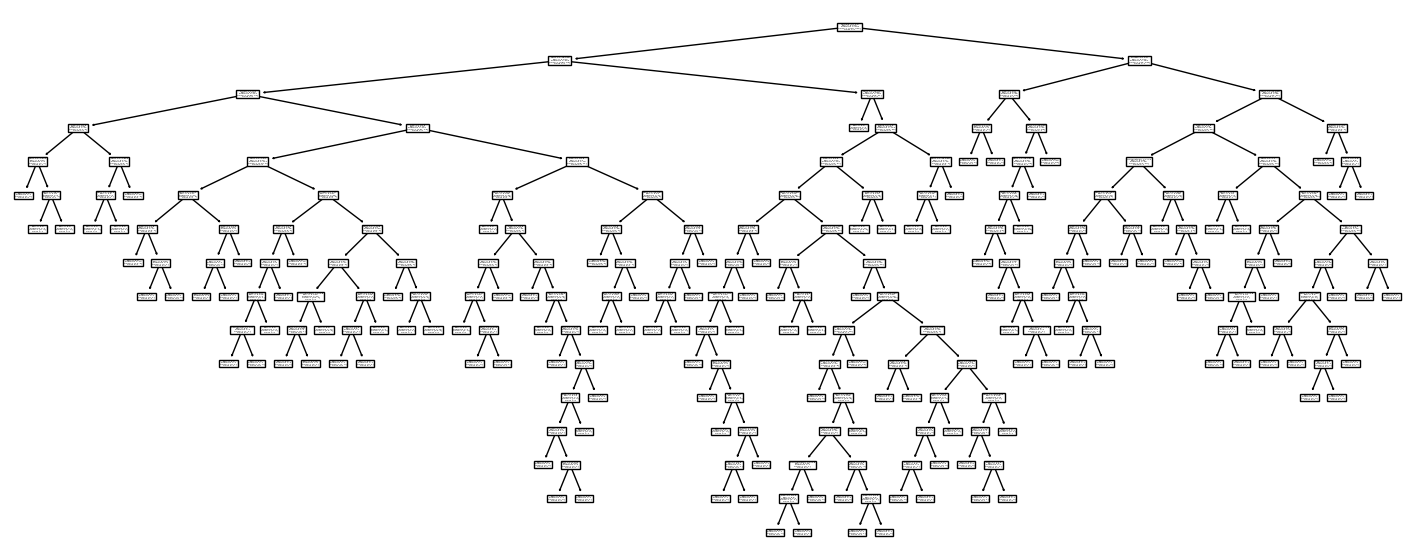

In [119]:
#Here max_depth is not set
# Using plot_tree to visualize the decision tree model 'tree1'
# Feature names are provided for better node labeling taken from X_train.columns
# Class names '0' and '1' correspond to the two classes in the binary classification of the Titanic dataset 
#(not survived  and survived)

plt.figure(figsize=(18, 7))
plot_tree(tree1, feature_names=X_train.columns.tolist(), class_names=['0','1'])
plt.show()

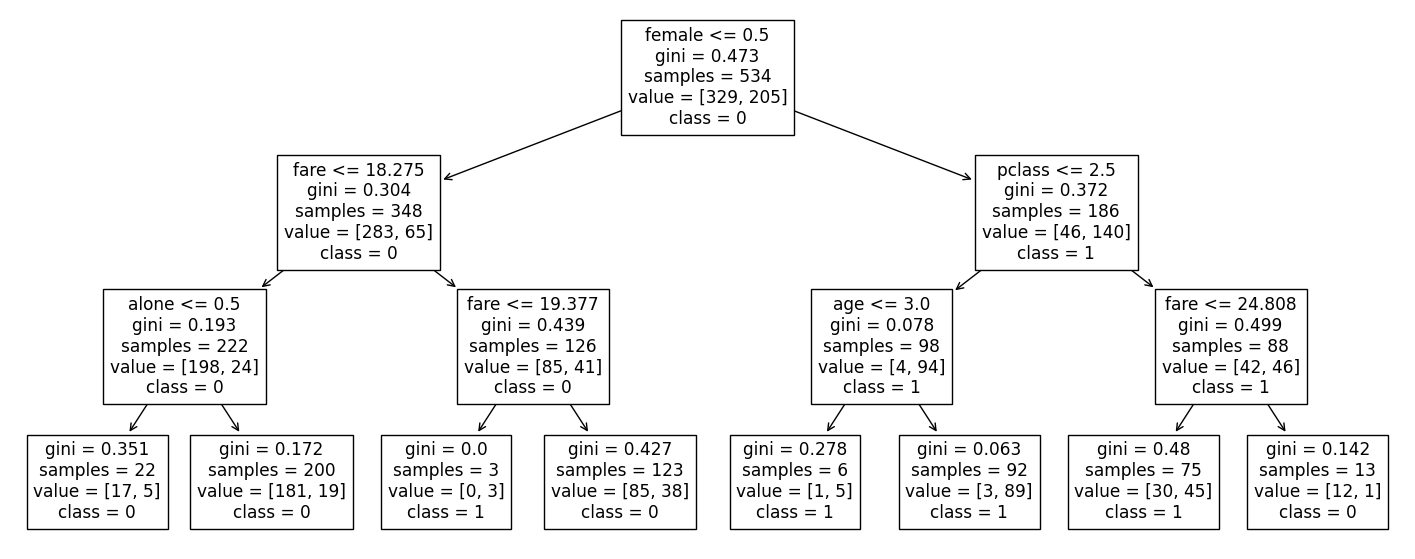

In [113]:
#Here max_depth is set to 3
# Using plot_tree to visualize the decision tree model 'tree1'
# Feature names are provided for better node labeling taken from X_train.columns
# Class names '0' and '1' correspond to the two classes in the binary classification of the Titanic dataset 
#(not survived  and survived)

plt.figure(figsize=(18, 7))
plot_tree(tree1, feature_names=X_train.columns.tolist(), class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [79]:
# we have our model clf, let's get those metrics from our informational output
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.99


In [80]:
# Confusion matrix
conf = confusion_matrix(y_train, y_predictions)
conf

array([[329,   0],
       [  3, 202]])

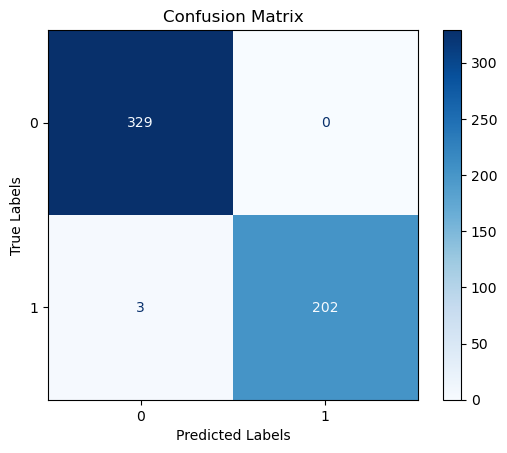

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_train contains the true labels and y_predictions contains the predicted labels
cm = confusion_matrix(y_train, y_predictions)
display_labels = ['0', '1']  

# Create a ConfusionMatrixDisplay object
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Set the colormap and plot the confusion matrix
confusion_matrix_display.plot(cmap=plt.cm.Blues)  

# Add title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()


In [83]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       329
           1       1.00      0.99      0.99       205

    accuracy                           0.99       534
   macro avg       1.00      0.99      0.99       534
weighted avg       0.99      0.99      0.99       534



### 4.Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [85]:
def compute_metrics(TN,FP,FN,TP):
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN

    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [87]:
confu = confusion_matrix(y_train,tree1.predict(X_train))
TN, FP, FN, TP = confu.ravel()
TN, FP, FN, TP 


(329, 0, 3, 202)

In [88]:
TN

329

In [89]:
compute_metrics(TN,FP,FN,TP)

Accuracy: 0.9943820224719101

True Positive Rate/Sensitivity/Recall/Power: 0.9853658536585366
False Positive Rate/False Alarm Ratio/Fall-out: 0.0
True Negative Rate/Specificity/Selectivity: 1.0
False Negative Rate/Miss Rate: 0.014634146341463415

Precision/PPV: 1.0
F1 Score: 0.9926289926289926

Support (0): 205
Support (1): 329


In [ ]:
#OR

In [90]:
labels = sorted(y_train.unique())
labels
confusion_df = pd.DataFrame(cm, index=[f'{label} actual' for label in labels], columns=[f'{label} predict' for label in labels])
confusion_df

,0 predict,1 predict
0 actual,329,0
1 actual,3,202


In [91]:
conf.ravel()

array([329,   0,   3, 202])

In [92]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(329, 0, 3, 202)

In [93]:
all = (TP + TN + FP + FN)

accuracy = (TP + TN) / all

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [94]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.9943820224719101

True Positive Rate/Sensitivity/Recall/Power: 0.9853658536585366
False Positive Rate/False Alarm Ratio/Fall-out: 0.0
True Negative Rate/Specificity/Selectivity: 1.0
False Negative Rate/Miss Rate: 0.014634146341463415

Precision/PPV: 1.0
F1 Score: 0.9926289926289926

Support (0): 205
Support (1): 329


### 5.Run through steps 2-4 using a different max_depth value.

In [95]:
#for one
tree2 = DecisionTreeClassifier(max_depth=10, random_state=7)
tree2 = tree2.fit(X_train, y_train)
tree2.score(X_train, y_train)

0.9531835205992509

In [96]:
#for many
for x in range(1,20):
#     print(x)
    tree = DecisionTreeClassifier(max_depth=x, random_state=7)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.79
for depth of  2, the accuracy is 0.79
for depth of  3, the accuracy is 0.82
for depth of  4, the accuracy is 0.83
for depth of  5, the accuracy is 0.84
for depth of  6, the accuracy is 0.86
for depth of  7, the accuracy is 0.88
for depth of  8, the accuracy is 0.9
for depth of  9, the accuracy is 0.93
for depth of 10, the accuracy is 0.95
for depth of 11, the accuracy is 0.97
for depth of 12, the accuracy is 0.98
for depth of 13, the accuracy is 0.98
for depth of 14, the accuracy is 0.99
for depth of 15, the accuracy is 0.99
for depth of 16, the accuracy is 0.99
for depth of 17, the accuracy is 0.99
for depth of 18, the accuracy is 0.99
for depth of 19, the accuracy is 0.99


In [99]:
#This function iterates through different max depths of a decision tree classifier, 
#evaluates its training and validation accuracies, stores the results in a DataFrame,
#and displays the top-performing configurations by validation accuracy.

#empty list created to store the results for different configurations of the decision tree classifier
scores_all = []

#loop iterates through values from 1 to 19
for x in range(1,20):

    #Create and Train Tree on training data
    tree = DecisionTreeClassifier(max_depth=x, random_state=7)
    tree.fit(X_train, y_train)
    
    # evaluate on train using score method on the train data 
    train_acc = tree.score(X_train, y_train)
    
    #Evaluate Validation accuracy on validate data using score method  
    val_acc = tree.score(X_val, y_val)
    
    #Append results
    scores_all.append([x, train_acc, val_acc])
    
# converts the scores_all list of lists into a pandas DataFrame named scores_df and assigns columns 
# max_depth','train_acc','val_acc'    
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
#sorts the DataFrame scores_df in descending order based on the 'val_acc' column
scores_df.sort_values(by=['val_acc'], ascending=False).head()

,max_depth,train_acc,val_acc
4,5,0.842697,0.803371
2,3,0.818352,0.792135
3,4,0.831461,0.792135
5,6,0.859551,0.780899
0,1,0.792135,0.775281


In [ ]:
# OR

In [34]:
# max depth = 1
tree2 = DecisionTreeClassifier(max_depth=1, random_state= 42)
tree2.fit(X_
          train, y_train)
tree2.score(X_train, y_train)

0.7921348314606742

In [52]:
# from previous tree1 max depth = 3
tree1.fit(X_train, y_train)
tree1.score(X_train, y_train)

0.8183520599250936

### 6.Which model performs better on your in-sample data?

- look at the highest training accuracy achieved among all the models you trained.



> The optimal model would be with a max depth of 15 or greater

- The model's performance on the data it was trained on (i.e., the training data)
- A higher training accuracy indicates that the model is overfitting the training data, but it doesn't necessarily mean the model will perform as well on new, unseen data (i.e., the validation or test data).

In [107]:
best_training_accuracy = scores_df['train_acc'].max()
best_training_accuracy

0.9943820224719101

### 7.Which model performs best on your out-of-sample data, the validate set?

- Out-of-sample data -The model's performance on data it hasn't seen during training, specifically the validation data

In [105]:
best_validation_accuracy = scores_df['val_acc'].max()
best_validation_accuracy

0.8033707865168539

In [ ]:
# Model with max depth of 12 is the optimal model

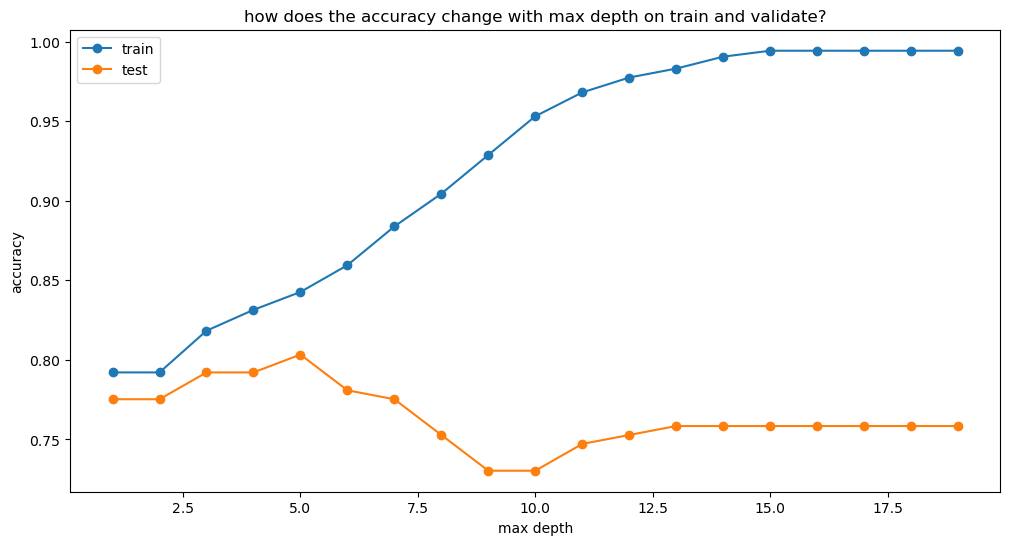

In [100]:
#Visualize how accuracy changes with different maximum depths for a decision tree classifier on both the training 
#and validation sets

plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='test', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()


> This chart highlights a fundamental topic called the bias variance trade off...

> Overfitting vs Underfitting

> Imagine a scatter plot so theres an x and y axis with various data points

> Underfitting (High Bias) would be drawing a straight line horizontally so hitting a small minority of the data. High train/test error because its failing to capture the data, to make accurate predictions

> Overfitting (High Variance) would be drawing a line through every single point of that line. Low train error because its fitting to the data so closely and high test error because it can't generlaize well

> Goal is to acheive a model that performs well in terms of your metrics/that predicts well on training and test data

 

In [ ]:
very close, but model with depth = 3

In [262]:
X_train.isnull().sum()

sibsp          0
parch          0
fare           0
alone          0
Cherbourg      0
Queenstown     0
Southampton    0
dtype: int64

In [263]:
# max depth = 1 
tree = DecisionTreeClassifier(max_depth=1, random_state= 42)
out_tree = tree.fit(X_train, y_train)
out_tree.score(X_val, y_val)


0.5955056179775281

In [264]:
# max depth = 3
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
out_tree = tree.fit(X_train, y_train)
out_tree.score(X_val, y_val)

0.6629213483146067

## Part II  Using Telco data

### 1.Work through these same exercises using the Telco dataset.


In [5]:
import acquire
from acquire import new_telco_data
import prepare
from prepare import prep_telco_for_dt


# Acquire data and prepping telco
telco = prep_telco_for_dt(new_telco_data())
telco

,tenure,monthly_charges,total_charges,churn
0,9,65.60,593.30,0
1,9,59.90,542.40,0
2,4,73.90,280.85,1
3,13,98.00,1237.85,1
4,3,83.90,267.40,1
...,...,...,...,...
7038,13,55.15,742.90,0
7039,22,85.10,1873.70,1
7040,2,50.30,92.75,0
7041,67,67.85,4627.65,0


In [6]:
telco.count()

tenure             7032
monthly_charges    7032
total_charges      7032
churn              7032
dtype: int64

In [44]:
# Train, validate, split data
train, validate, test = split_function(telco, 'churn')

In [45]:
train.head()

,tenure,monthly_charges,total_charges,churn
5911,26,39.95,1023.75,No
2479,47,26.90,1250.85,No
5889,1,50.45,50.45,Yes
6087,69,60.05,4176.7,No
785,51,87.55,4475.9,No


In [49]:
X_train = train.drop(columns='churn')
y_train = train.churn

X_val = validate.drop(columns='churn')
y_val = validate.churn

X_test = test.drop(columns='churn')
y_test = test.churn

In [50]:
train.churn.value_counts()


churn
0    3095
1    1121
Name: count, dtype: int64

In [51]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.41%


In [52]:
# Make the model
churn_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

In [53]:
#fit the model
churn_tree1 = churn_tree.fit(X_train, y_train)

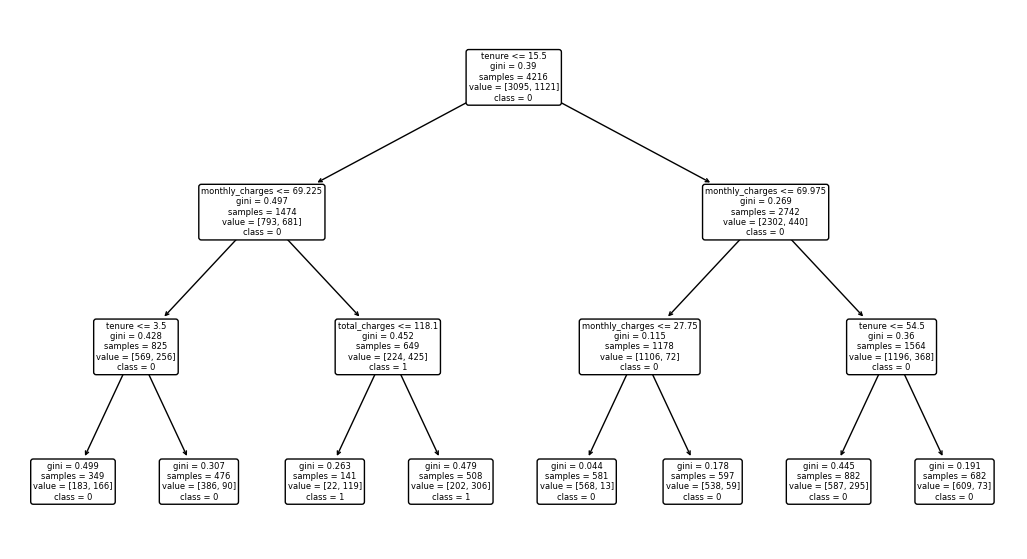

In [54]:
#visualize
plt.figure(figsize=(13, 7))
plot_tree(churn_tree, feature_names=X_train.columns.tolist(), 
class_names = np.array(churn_tree.classes_).astype('str').tolist(), rounded=True)
plt.show()

### 2.Experiment with this model on other datasets with a higher number of output classes.


In [55]:
accuracy = churn_tree.score(X_train, y_train)
print(f'Model 1 accuracy: {accuracy:.2%}')

Model 1 accuracy: 78.18%
